In [118]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

df_dev = pd.read_csv("fall_project_dataset/development.csv", index_col=0)
df_eval = pd.read_csv("fall_project_dataset/evaluation.csv", index_col=0)

# Create a dictionary from the OCCP code to the text representation
import csv
reader = csv.reader(open('produced_documents/occp_to_string.csv', 'r'), delimiter=';')
d = {}
for row in reader:
   k, v = row
   k = float(k)
   d[k] = v

# Map the OCCP column to its text values
df_dev["OCCP"] = df_dev["OCCP"].map(d)

# Keep only the first 3 characters 
df_dev["OCCP"] = df_dev["OCCP"].apply(lambda occp : occp[0:3])


numeric_features = ['PINCP', 'WKHP']
numeric_transformer = StandardScaler()

#categorical_features = ['FDEYEP', 'ENG', 'OC', 'COW', 'HICOV', 'SCHL', 'MIG', 'VPS', 'MIL', 'MAR', 'OCCP', 'PUBCOV', 'DEAR', 'JWAP', 'JWDP', 'SEX', 'RAC1P']#, 'PAOC', 'MIGSP' 'FER']
categorical_features = ['FDEYEP', 'ENG', 'OC', 'COW', 'HICOV', 'LANP', 'FER', 'MIGSP', 'SCHL', 'MIG', 'VPS', 'MIL', 'MAR', 'OCCP', 'PAOC', 'PUBCOV', 'DEAR', 'JWAP', 'JWDP', 'POBP', 'SEX', 'RAC1P']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Drop the columns I don't like
# df_dev = df_dev.drop(["POBP", "LANP", "MIGSP", "PAOC", "FER"], axis=1)

X = df_dev.drop(columns=["JWMNP"])
y = df_dev["JWMNP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

param_grid={
    'classifier__n_estimators': [10, 50, 100],
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__max_features': [1.0, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

search = GridSearchCV(pipe, param_grid, scoring="f1_macro", n_jobs=6)

search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f)" % search.best_score_)
print(f"Best parameters: {search.best_params_}")
print("Best estimator score on test data: %.3f" % search.best_estimator_.score(X_test, y_test))

## Scores

Withouth columns "POBP", "LANP", "MIGSP": 0.8881456352429643

In [49]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42, criterion='gini', max_features=1.0, n_estimators=100, n_jobs=6, class_weight='balanced'))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8869033398633475

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      #('classifier', BalancedRandomForestClassifier(random_state=42, criterion='gini', max_features=1.0, n_estimators=100, n_jobs=6, sampling_strategy='majority', replacement=False))])
                      ('classifier', EasyEnsembleClassifier(random_state=42, n_estimators=100, n_jobs=6, sampling_strategy='majority', replacement=False))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.16331406182808544

In [61]:
y_pred = pipe.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.00626873307674306

In [31]:
from sklearn.metrics import f1_score
y_pred = pipe.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.25717044613010903

In [2]:
df_1h = pd.get_dummies(df_dev, columns=['FDEYEP', 'ENG', 'OC', 'COW', 'HICOV', 'LANP', 'FER', 'MIGSP', 'SCHL', 'MIG', 'VPS', 'MIL', 'MAR', 'OCCP', 'PAOC', 'PUBCOV', 'DEAR', 'JWAP', 'JWDP', 'POBP', 'SEX', 'RAC1P'])
df_1h.shape

(104642, 985)

In [3]:
df_drop = df_dev.drop(["POBP", "LANP", "MIGSP"], axis=1)
df_drop_1h = pd.get_dummies(df_drop, columns=['FDEYEP', 'ENG', 'OC', 'COW', 'HICOV', 'FER', 'SCHL', 'MIG', 'VPS', 'MIL', 'MAR', 'OCCP', 'PAOC', 'PUBCOV', 'DEAR', 'JWAP', 'JWDP', 'SEX', 'RAC1P'])
df_drop_1h.shape

(104642, 554)

## Correlation study

/Users/danielemansillo/Documents/PoliTo/DSL/DSL_project_fall_23/venv/lib/python3.11/site-packages/dython/nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/danielemansillo/Documents/PoliTo/DSL/DSL_project_fall_23/venv/lib/python3.11/site-packages/dython/nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


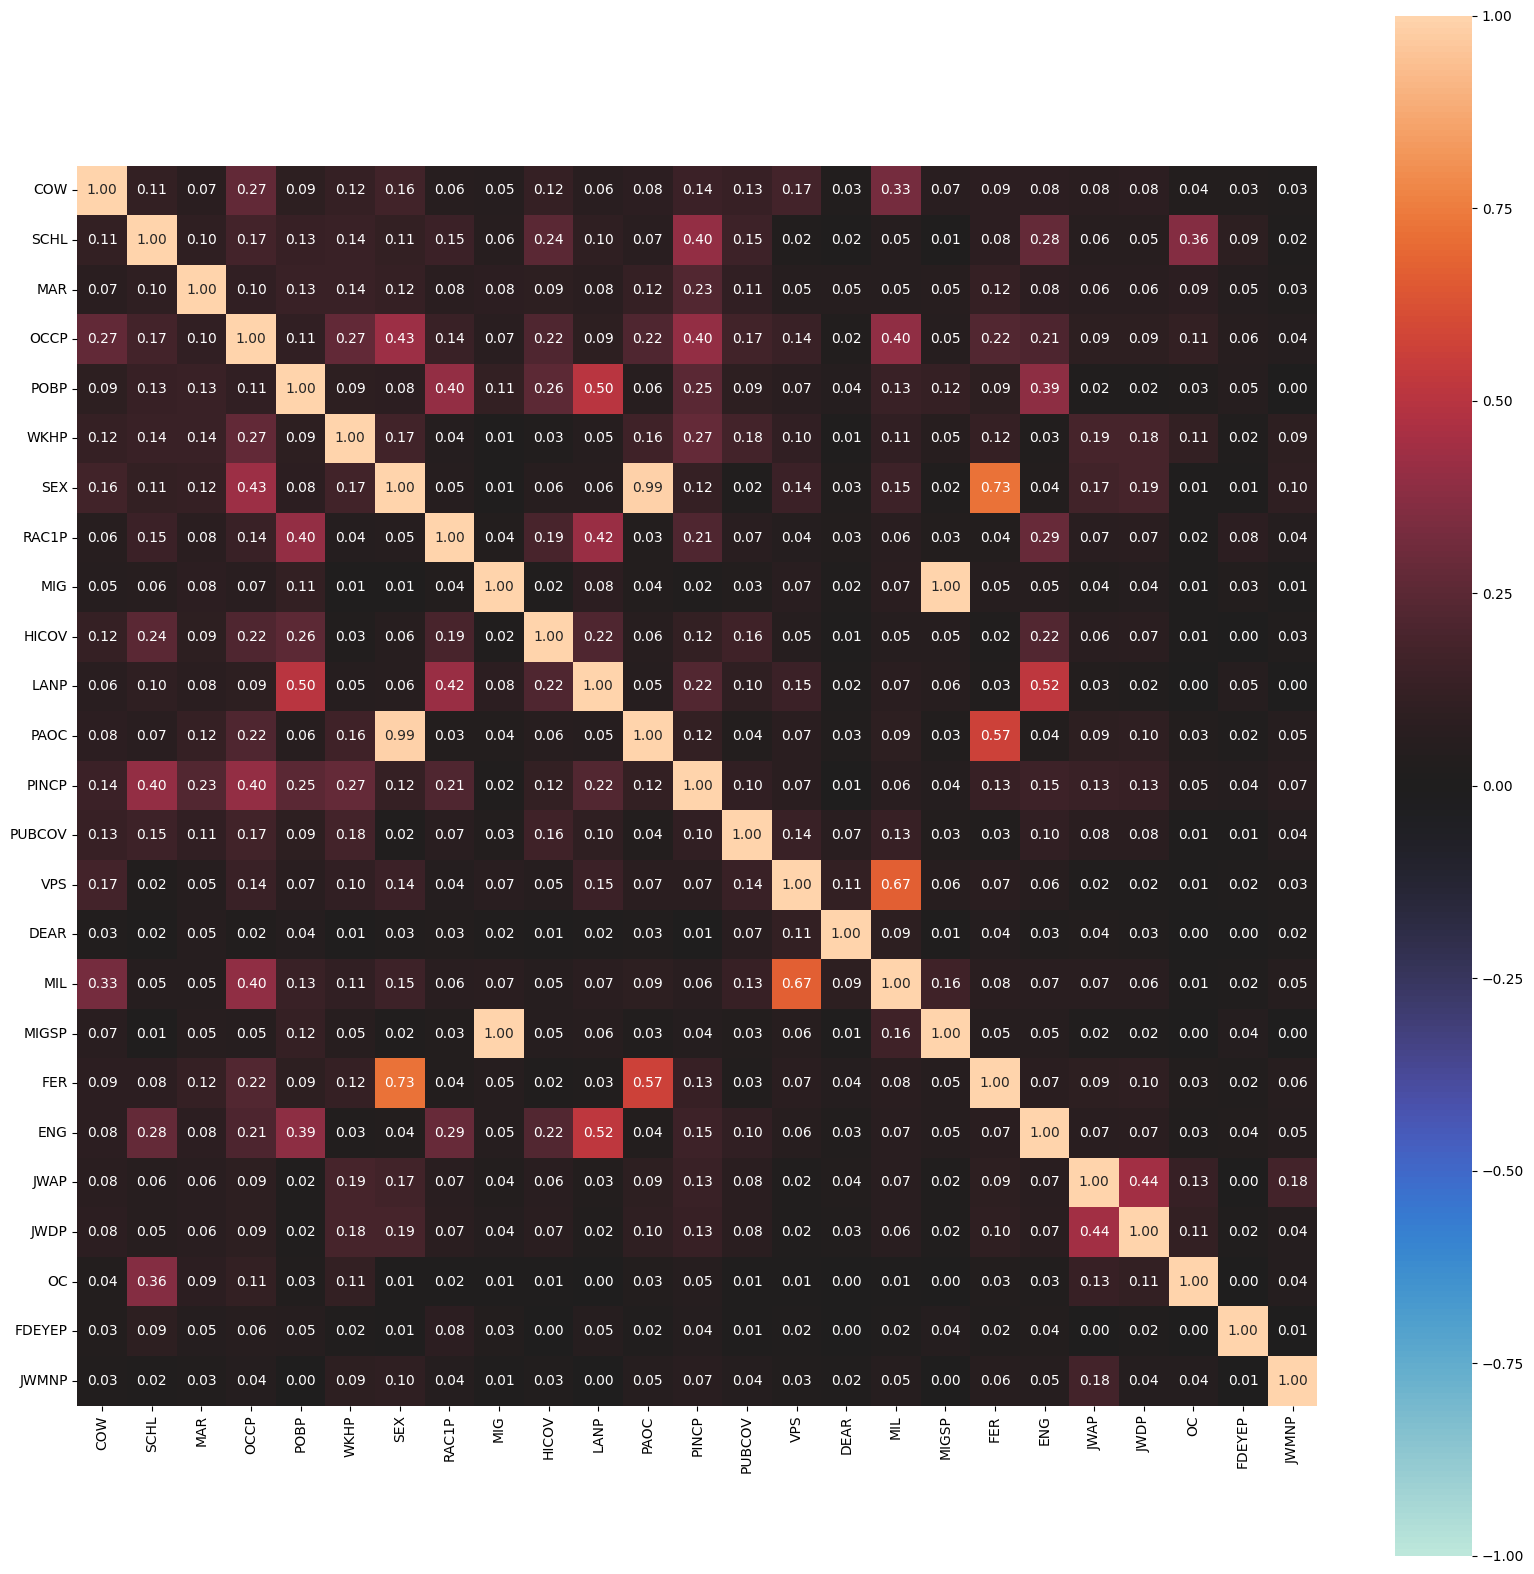

{'corr':              COW      SCHL       MAR      OCCP      POBP      WKHP       SEX  \
 COW     1.000000  0.112972  0.070989  0.273254  0.089053  0.121725  0.164441   
 SCHL    0.112972  1.000000  0.099172  0.174357  0.127972  0.139574  0.111045   
 MAR     0.070989  0.099172  1.000000  0.103446  0.134448  0.135674  0.124867   
 OCCP    0.273254  0.174357  0.103446  1.000000  0.108740  0.266319  0.427256   
 POBP    0.089053  0.127972  0.134448  0.108740  1.000000  0.087568  0.082516   
 WKHP    0.121725  0.139574  0.135674  0.266319  0.087568  1.000000  0.165434   
 SEX     0.164441  0.111045  0.124867  0.427256  0.082516  0.165434  1.000000   
 RAC1P   0.056592  0.145395  0.075711  0.135390  0.404105  0.041601  0.052983   
 MIG     0.053147  0.056743  0.078718  0.065901  0.110197  0.011746  0.014981   
 HICOV   0.122105  0.242925  0.089488  0.217219  0.256037  0.028870  0.059785   
 LANP    0.064574  0.097152  0.076918  0.091340  0.504697  0.053310  0.058686   
 PAOC    0.084347  0

In [10]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

associations(df_dev, nominal_columns=categorical_features, numerical_columns=numeric_features, filename= 'produced_documents/complete_correlation.png', figsize=(20,20))

In [ ]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(df_dev.drop(columns=["JWMNP"]), df_dev["JWMNP"])

print(sorted(Counter(y_resampled).items()))

In [99]:
from imblearn.over_sampling import RandomOverSampler

X = df_dev.drop(columns=["JWMNP"])
y = df_dev["JWMNP"]
categorical_features = ['FDEYEP', 'ENG', 'OC', 'COW', 'HICOV', 'LANP', 'FER', 'MIGSP', 'SCHL', 'MIG', 'VPS', 'MIL', 'MAR', 'OCCP', 'PAOC', 'PUBCOV', 'DEAR', 'JWAP', 'JWDP', 'POBP', 'SEX', 'RAC1P']
actual_samples = sorted(Counter(y).items())

print(actual_samples)

desired_samples = {k: v if v >=10 else 10 for k, v in actual_samples}

print(desired_samples)

ros = RandomOverSampler(random_state=42, sampling_strategy=desired_samples)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

smote_nc = SMOTENC(categorical_features, random_state=42)
X_resampled_nc, y_resampled_nc = smote_nc.fit_resample(X_resampled, y_resampled)

print(sorted(Counter(y_resampled_nc).items()))

[(1.0, 770), (2.0, 723), (3.0, 624), (4.0, 243), (5.0, 5697), (6.0, 430), (7.0, 1128), (8.0, 907), (9.0, 155), (10.0, 11817), (11.0, 134), (12.0, 1071), (13.0, 257), (14.0, 125), (15.0, 15414), (16.0, 128), (17.0, 312), (18.0, 378), (19.0, 45), (20.0, 15075), (21.0, 46), (22.0, 240), (23.0, 127), (24.0, 64), (25.0, 6724), (26.0, 57), (27.0, 74), (28.0, 114), (29.0, 20), (30.0, 15714), (31.0, 11), (32.0, 64), (33.0, 29), (34.0, 32), (35.0, 3022), (36.0, 26), (37.0, 35), (38.0, 42), (39.0, 11), (40.0, 4243), (41.0, 1), (42.0, 35), (43.0, 6), (44.0, 9), (45.0, 6131), (46.0, 13), (47.0, 13), (48.0, 29), (49.0, 10), (50.0, 1645), (51.0, 3), (52.0, 9), (53.0, 7), (54.0, 5), (55.0, 433), (56.0, 19), (57.0, 5), (58.0, 21), (59.0, 27), (60.0, 5355), (61.0, 4), (62.0, 10), (63.0, 5), (64.0, 4), (65.0, 194), (66.0, 9), (67.0, 5), (68.0, 11), (69.0, 6), (70.0, 364), (72.0, 9), (73.0, 1), (74.0, 2), (75.0, 545), (76.0, 1), (77.0, 1), (78.0, 4), (80.0, 255), (83.0, 1), (85.0, 36), (87.0, 4), (88.0, 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier(random_state=42, criterion='gini', max_features=1.0, n_estimators=100, n_jobs=6))])

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.8894134477825465
0.4449706979714154


In [104]:
X_2 = df_dev.drop(columns=["JWMNP"])
y_2 = df_dev["JWMNP"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

y_pred_2 = pipe.predict(X_test_2)
print(f1_score(y_test_2, y_pred_2, average='macro'))

0.6781461864313871
